# Bloch Sphere

[![Download Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_bloch_sphere.ipynb)&emsp;
[![Download Code](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_bloch_sphere.py)&emsp;
[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_en/beginner/bloch_sphere.ipynb)

## Single-qubit State

Unlike classical bits, qubits can be in both the computational basis vector $\left|0\right>$ state and the $\left|1\right>$ state, usually expressed as

$$\left|\psi\right> = a\left|0\right> + b\left|1\right>$$

Here $a$ and $b$ are complex numbers. Due to the normalization condition of the quantum state $\left<\psi\middle|\psi\right> = 1$, therefore

$$\left|a\right|^2 + \left|b\right|^2 = 1$$

For a two-dimensional Hilbert space, we can make the following mapping of the computational basis vector

$$
\left|0\right> =
    \begin{pmatrix}
    1 \\
    0
    \end{pmatrix},
\left|1\right> =
    \begin{pmatrix}
    0 \\
    1
    \end{pmatrix}
$$

Thus, any single-qubit state can be expressed as

$$\left|\psi\right> =
    \begin{pmatrix}
    a \\
    b
    \end{pmatrix}
$$

In the general case, we do not care about the global phase, so we can assume $a=\cos\left(\theta/2\right), b=e^{i\phi}\sin\left(\theta/2\right)$:

$$\left|\psi\right> = \cos\left(\theta/2\right) \left|0\right> + e^{i\phi}\sin\left(\theta/2\right)\left|1\right>$$

Here we might as well represent that arbitrary quantum state in the unit ball, as follows, taking $\theta$ and $\phi$ as the elevation and azimuth angles, respectively.

![bloch-sphere](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/docs/mindquantum/docs/source_zh_cn/images/bloch_sphere.png)

Next we will show how to demonstrate a single-qubit state in MindSpore Quantum and the evolution of the single-qubit state in the form of an animation.

## Importing Related Modules

In [9]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import RX, RZ
from mindquantum.io.display import BlochScene

In order to dynamically display quantum states in Jupyter Notebook, we need to run the following command.

In [10]:
%matplotlib ipympl

## Building Quantum Circuit

From the above bloch sphere, we can control the elevation angle $\theta$ by the revolving gate [RX](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RX.html) and the azimuth angle $\phi$ by [RZ](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RZ.html). Therefore, we can build the following quantum circuit.

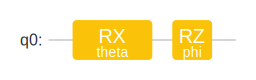

In [11]:
circ = Circuit()               # Build circuit for preparing an arbitrary single-qubit quantum state
circ += RX('theta').on(0)      # Control elevation via RX gate
circ += RZ('phi').on(0)        # Control azimuth via RZ gate
circ.svg()

Here we might as well take $\theta=\pi/4, \phi=\pi/4$ and calculate the corresponding quantum state.

In [12]:
import numpy as np

state1 = circ.get_qs(pr={'theta': np.pi/4, 'phi': np.pi/4})
print(state1)

[0.85355339-0.35355339j 0.14644661-0.35355339j]


## Displaying the Quantum State

In MindSpore Quantum, [BlochScene](https://www.mindspore.cn/mindquantum/docs/en/master/io/mindquantum.io.BlochScene.html) is the module used to display the Bloch sphere. We can add as many single-qubit states as we want to the [BlochScene](https://www.mindspore.cn/mindquantum/docs/en/master/io/mindquantum.io.BlochScene.html) and also animate the evolution of the single-qubit quantum states.

<IPython.core.display.Javascript object>


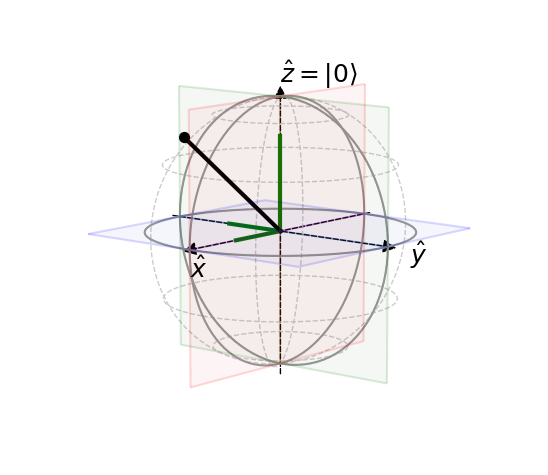

In [13]:
scene = BlochScene()                       # Create Bloch drawing scene
fig, ax = scene.create_scene()             # Initialize the scene
state_obj1 = scene.add_state(ax, state1)   # Add a quantum state to the scene

In addition, we can also show the Bloch sphere in dark mode, as follows.

<IPython.core.display.Javascript object>


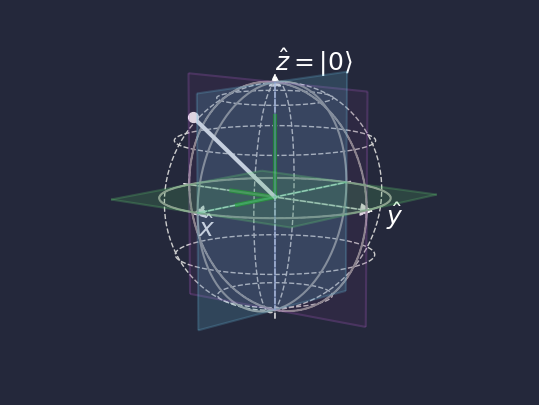

In [14]:
scene = BlochScene('dark')                       # Create Bloch drawing scene
fig, ax = scene.create_scene()                   # Initialize the scene
state_obj1 = scene.add_state(ax, state1)         # Add a quantum state to the scene

## Displaying the Evolution of the Quantum State

We can also create animations in the [Bloch scene](https://www.mindspore.cn/mindquantum/docs/en/master/io/mindquantum.io.BlochScene.html) when the quantum state is a time-dependent quantum state. Here we may assume that the elevation $\theta$ and azimuthal $\phi$ are time-dependent and we can obtain the quantum states for all time.

In [20]:
t = np.linspace(0, 10, 500)
all_theta = 4 * np.sin(2 * t)
all_phi = 5 * np.cos(3 * t)
states = []
for theta, phi in zip(all_theta, all_phi):
    states.append(circ.get_qs(pr={'theta': theta, 'phi': phi}))
states = np.array(states)

In the following, we create a dark [Bloch scene](https://www.mindspore.cn/mindquantum/docs/en/master/io/mindquantum.io.BlochScene.html) and initialize the scene with the first one of the evolved quantum states.

<IPython.core.display.Javascript object>


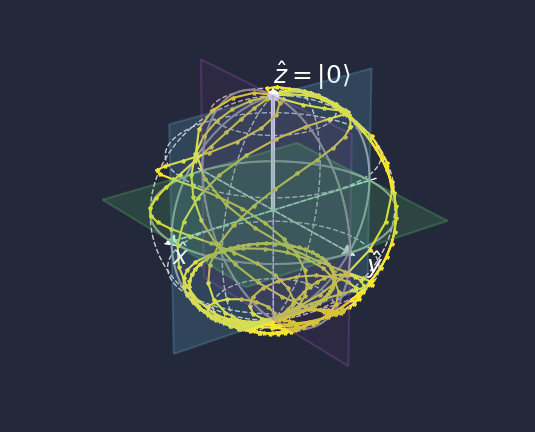

In [22]:
scene = BlochScene('dark')                          # Create Bloch drawing scene
fig, ax = scene.create_scene()                      # Initialize the scene
state_obj = scene.add_state(ax, states[0])          # Add a quantum state to the scene

To be able to display dynamically the evolution of quantum states, we create an animated object from the [Bloch scene](https://www.mindspore.cn/mindquantum/docs/en/master/io/mindquantum.io.BlochScene.html).

In [23]:
anim = scene.animation(fig, ax, state_obj, states)

![bloch-sphere-anim](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/docs/mindquantum/docs/source_zh_cn/images/bloch_sphere.gif)

From this, we can see that the quantum state of a single qubit has moved in the Bloch sphere.

In [1]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')

Software,Version
mindquantum,0.9.11
scipy,1.10.1
numpy,1.24.4
System,Info
Python,3.8.17
OS,Linux x86_64
Memory,16.62 GB
CPU Max Thread,16
Date,Tue Jan 2 14:38:36 2024
